In [2]:
import pandas as pd
import numpy as np

<div center=True,> <FONT size="3pt">
L'objectif ici est de normaliser les données pour ensuite pouvoir les exploiter via un modèle de timeserie. 

Pour l'étude, je me concentre pour le moment sur les df_reduce avec le nb de commande et le **total TTC** de la commande
</div>

# Une ligne par commande - Fichiers complets

In [3]:
data_just_eat = pd.read_csv("../raw_data/Ventes Fuzi/fuzi_4_just_eat.csv")
data_just_eat.head()

,Order,Date,Postcode,Total amount,Paid online,Pickup
0,ZBY77D,2021-01-08 10:29:43,69100.0,12.5,yes,no
1,GX0WA7,2021-01-10 19:01:26,69100.0,35.0,yes,no
2,RTHONQ,2021-01-11 10:05:13,69003.0,32.5,yes,no
3,AKH02L,2021-01-11 20:28:31,69003.0,30.0,yes,no
4,1G39NV,2021-01-14 12:37:10,69100.0,12.0,yes,no


In [4]:
data_deliveroo = pd.read_csv("../raw_data/Ventes Fuzi/fuzi_2_Deliveroo.csv",sep=";")
data_deliveroo.head()

,Nom du restaurant,NumÃ©ro de commande,Date et heure de livraison (UTC),Heure de livraison,Etat de la commande ou horaire de livraison,TTC,Paiement,HT,TVA,Commission de Deliveroo,Commission / ajustement TVA,DATE
0,Fuzi,427201447,2020-09-29,17:20:03,Livraison,37,Completed,"33,64","3,36","11,10","2,22",29/09/2020
1,Fuzi,427210048,2020-09-29,17:25:53,Livraison,"17,5",Completed,"15,91","1,59","5,25","1,05",29/09/2020
2,Fuzi,427301132,2020-09-29,18:40:25,Livraison,14,Completed,"12,73","1,27","4,20","0,84",29/09/2020
3,Fuzi,427344247,2020-09-29,19:20:44,Livraison,45,Completed,"40,91","4,09","13,50","2,70",29/09/2020
4,Fuzi,427526795,2020-09-30,10:14:09,Livraison,"9,5",Completed,"8,64","0,86","2,85","0,57",30/09/2020


In [5]:
data_uber = pd.read_csv("../raw_data/Ventes Fuzi/fuzi_1_ubereat.csv",sep=";")
data_uber.head()

,"Id, de la commande",Identifiant du processus,Nom du restaurant,Date de la commande / Date du remboursement,Heure d'acceptation de la commande,Type de restauration,Canal de commande,Vente de produits alimentaires (hors TVA),TVA 1 sur la vente de produits alimentaires,TVA 2 sur la vente de produits alimentaires,...,Lien vers la facture d'Uber pour le restaurant,Ajustement de la TVA,Gain sur les frais de livraison,Pourboire,Description des sommes uniques,Divers Paiements (TVA incluse),9UBER Versement,Date du versement,Statut de la commande,Unnamed: 48
0,#1F6A9,NaN,Fuzi,2020-09-22,13:00,Livraison — Coursier utilisant l'application Uber,iOS,"21,72",0,"2,17",...,"https://restaurant,uber,com/payments/download+...",0,0,0,NaN,0,"15,3",28/09/2020,Terminée,NaN
1,#EB664,NaN,Fuzi,2020-09-22,14:14,Livraison — Coursier utilisant l'application Uber,iOS,"27,73",0,"2,77",...,"https://restaurant,uber,com/payments/download+...",0,0,0,NaN,0,"19,52",28/09/2020,Terminée,NaN
2,#A86C8,NaN,Fuzi,2020-09-22,14:30,Livraison — Coursier utilisant l'application Uber,Uber Eats Web,"9,91",0,"0,99",...,"https://restaurant,uber,com/payments/download+...",0,0,0,NaN,0,"6,98",28/09/2020,Terminée,NaN
3,#65297,NaN,Fuzi,2020-09-22,18:57,Livraison — Coursier utilisant l'application Uber,Uber Eats Web,"16,36",0,"1,64",...,"https://restaurant,uber,com/payments/download+...",0,0,0,NaN,0,"11,52",28/09/2020,Terminée,NaN
4,#F67AE,NaN,Fuzi,2020-09-22,19:36,Livraison — Coursier utilisant l'application Uber,Uber Eats Web,"23,64",0,"2,36",...,"https://restaurant,uber,com/payments/download+...",0,0,0,NaN,0,"16,64",28/09/2020,Terminée,NaN


In [6]:
data_stripe = pd.read_csv("../raw_data/Ventes Fuzi/fuzi_3_stripe.csv",sep=";")
data_stripe.head()

,id,Paiement,Date,Montant TTC,Part TVA,Paiement.1,CUS_key,SRC_key,PO_key,Nom,Email,Numéro de commande,Si
0,ch_1HbVquAIpbzGepqVCvP4PQ6u,ok,2020-10-12,190,"2,91",Paid,NaN,NaN,po_1HbyrdAIpbzGepqVoEXLD8hh,NaN,NaN,Fuzi - Commande 719,https://fuzi.fr
1,ch_1Hbk5FAIpbzGepqVEy631JEo,ok,2020-10-13,37,"0,77",Paid,NaN,NaN,po_1HcL15AIpbzGepqVhL3WTFHq,NaN,NaN,Fuzi - Commande 730,https://fuzi.fr
2,ch_1HcDrXAIpbzGepqVNWneSMM2,ok,2020-10-14,53,"0,99",Paid,NaN,NaN,po_1HchQkAIpbzGepqVWfp4y7XI,NaN,NaN,Fuzi - Commande 767,https://fuzi.fr
3,ch_1HcaCcAIpbzGepqVZraPYdSz,ok,2020-10-15,"27,5","0,64",Paid,NaN,NaN,po_1Hd3qeAIpbzGepqVSi0RExmk,NaN,NaN,Fuzi - Commande 770,https://fuzi.fr
4,ch_1HdIr1AIpbzGepqVEiUuP8bL,ok,2020-10-17,15,"0,46",Paid,NaN,NaN,po_1HdnEiAIpbzGepqVCEyYw4Lm,NaN,NaN,Fuzi - Commande 772,https://fuzi.fr


In [7]:
data_zettle = pd.read_csv("../raw_data/Ventes Fuzi/fuzi_5_zettle.csv",sep=";")
data_zettle.head()

,Date,Temps,Numéro de reçu,TVA (5.5%),TVA (10.0%),TVA (20.0%),Total,Frais,Montant net,Moyen de paiement,Fournisseur de carte,Derniers chiffres,Membre,Descriptif,Origine de l'achat
0,05/04/2021,11:17:19,1,"0,00 €","0,18 €","0,00 €","2,00 €","0,04 €","1,96 €",Contactless,VISA,2024,Valentin Harris VIONNET-FUASSET,Arancini à la tomme Mun 100% italienne (Aranci...,POS
1,05/04/2021,11:18:38,2,"0,00 €","-0,18 €","0,00 €","-2,00 €","-0,04 €","-1,96 €",Remboursement,VISA,2024,Valentin Harris VIONNET-FUASSET,-1 x Arancini à la tomme Mun 100% italienne (A...,POS
2,08/04/2021,13:13:34,3,"0,00 €","2,14 €","0,00 €","23,50 €","0,41 €","23,09 €",Contactless,MASTERCARD,8985,Valentin Harris VIONNET-FUASSET,2 x Gramigna pesto rosso (Gramigna pesto rosso...,POS
3,09/04/2021,12:53:20,4,"0,00 €","1,50 €","0,00 €","16,50 €","0,29 €","16,21 €",Contactless,VISA,4814,Valentin Harris VIONNET-FUASSET,"Bigoli carbonara (Bigoli carbonara), Arancini ...",POS
4,09/04/2021,12:54:22,5,"0,00 €","1,50 €","0,00 €","16,50 €","0,29 €","16,21 €",Contactless,VISA,3737,Valentin Harris VIONNET-FUASSET,Arancini à la tomme Mun 100% italienne (Aranci...,POS


# Preprocessing

## Just Eat

In [8]:
data_just_eat.dtypes

Order            object
Date             object
Postcode        float64
Total amount     object
Paid online      object
Pickup           object
dtype: object

In [9]:
data_just_eat_reduce = data_just_eat[["Total amount","Order","Date"]]
data_just_eat_reduce = data_just_eat_reduce.rename(columns={"Total amount" : "total_ttc"})
for index, url in enumerate(data_just_eat_reduce['total_ttc']):
    if "," in data_just_eat_reduce['total_ttc'][index]:
        data_just_eat_reduce["total_ttc"][index] = data_just_eat_reduce["total_ttc"][index].replace(',','.')
    data_just_eat_reduce["total_ttc"][index] = float(data_just_eat_reduce["total_ttc"][index])
data_just_eat_reduce["total_ttc"] = data_just_eat_reduce["total_ttc"].astype(float)
data_just_eat_reduce['Date'] = pd.to_datetime(data_just_eat_reduce['Date']).dt.date
data_just_eat_reduce 

,total_ttc,Order,Date
0,12.5,ZBY77D,2021-01-08
1,35.0,GX0WA7,2021-01-10
2,32.5,RTHONQ,2021-01-11
3,30.0,AKH02L,2021-01-11
4,12.0,1G39NV,2021-01-14
...,...,...,...
94,16.5,DWSN7F,2021-10-26
95,11.5,ZX5TZ9,2021-10-27
96,21.0,H9COIP,2021-10-27
97,19.0,QQY2D5,2021-10-28


## Deliveroo

In [10]:
data_deliveroo.dtypes

Nom du restaurant                              object
NumÃ©ro de commande                             int64
Date et heure de livraison (UTC)               object
Heure de livraison                             object
Etat de la commande ou horaire de livraison    object
TTC                                            object
Paiement                                       object
HT                                             object
TVA                                            object
Commission de Deliveroo                        object
Commission / ajustement TVA                    object
DATE                                           object
dtype: object

In [11]:
data_deliveroo = data_deliveroo[data_deliveroo['Paiement'] == 'Completed'].reset_index(drop=True)
data_deliveroo_reduce = data_deliveroo[["TTC", "NumÃ©ro de commande","Date et heure de livraison (UTC)"]].rename(columns={"TTC" : "total_ttc","NumÃ©ro de commande":"Order","Date et heure de livraison (UTC)":"Date"})
data_deliveroo_reduce = data_deliveroo_reduce.reset_index(drop=True)
for index, url in enumerate(data_deliveroo_reduce['total_ttc']):
    if "," in data_deliveroo_reduce['total_ttc'][index]:
        data_deliveroo_reduce["total_ttc"][index] = data_deliveroo_reduce["total_ttc"][index].replace(',','.')
    data_deliveroo_reduce["total_ttc"][index] = float(data_deliveroo_reduce["total_ttc"][index])
data_deliveroo_reduce["total_ttc"] = data_deliveroo_reduce["total_ttc"].astype(float)
data_deliveroo_reduce['Date'] = pd.to_datetime(data_deliveroo_reduce['Date']).dt.date
data_deliveroo_reduce.head()


/var/folders/jp/43tqqk8n6vx93mnlkzb13g2w0000gn/T/ipykernel_8812/3903123405.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_deliveroo_reduce["total_ttc"][index] = float(data_deliveroo_reduce["total_ttc"][index])
/var/folders/jp/43tqqk8n6vx93mnlkzb13g2w0000gn/T/ipykernel_8812/3903123405.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_deliveroo_reduce["total_ttc"][index] = data_deliveroo_reduce["total_ttc"][index].replace(',','.')


,total_ttc,Order,Date
0,37.0,427201447,2020-09-29
1,17.5,427210048,2020-09-29
2,14.0,427301132,2020-09-29
3,45.0,427344247,2020-09-29
4,9.5,427526795,2020-09-30


In [12]:
data_deliveroo_reduce.dtypes

total_ttc    float64
Order          int64
Date          object
dtype: object

## Uber

In [13]:
data_uber.rename(columns = {list(data_uber)[3]: 'Date'}, inplace = True)
data_uber.columns

Index(['Id, de la commande', 'Identifiant du processus', 'Nom du restaurant',
       'Date', 'Heure d'acceptation de la commande', 'Type de restauration',
       'Canal de commande', 'Vente de produits alimentaires (hors TVA)',
       'TVA 1 sur la vente de produits alimentaires',
       'TVA 2 sur la vente de produits alimentaires',
       'TVA 3 sur la vente de produits alimentaires',
       'Vente de produits alimentaires (TVA incluse)',
       'Réduction sur le repas (hors TVA)',
       'TVA 1 sur la réduction sur le repas',
       'TVA 2 sur la réduction sur le repas',
       'TVA 2 sur la réduction sur le repas.1',
       'Réduction sur le repas (TVA comprise)',
       'Ajustement des frais de service marketing',
       'Ajustements du prix (hors TVA)', 'Paiement effectué par un tiers',
       'Payeur tiers', 'TVA sur les ajustements du prix',
       'Ajustements du prix (TVA comprise)', 'Frais de livraison (hors TVA)',
       'TVA 1 sur les frais de livraison', 'TVA 2 sur les fr

In [14]:
data_uber_reduce = data_uber[["Vente de produits alimentaires (TVA incluse)", "Id, de la commande","Date"]].rename(columns={"Vente de produits alimentaires (TVA incluse)" : "total_ttc","Id, de la commande":"Order","Date":"Date"})
data_uber_reduce.head().dtypes

total_ttc    object
Order        object
Date         object
dtype: object

In [15]:
for index, url in enumerate(data_uber_reduce['total_ttc']):
    if "," in data_uber_reduce['total_ttc'][index]:
        data_uber_reduce["total_ttc"][index] = data_uber_reduce["total_ttc"][index].replace(',','.')
    data_uber_reduce["total_ttc"][index] = float(data_uber_reduce["total_ttc"][index])
data_uber_reduce["total_ttc"] = data_uber_reduce["total_ttc"].astype(float)
data_uber_reduce['Date'] = pd.to_datetime(data_uber_reduce['Date'])#.dt.date
data_uber_reduce

,total_ttc,Order,Date
0,23.9,#1F6A9,2020-09-22
1,30.5,#EB664,2020-09-22
2,10.9,#A86C8,2020-09-22
3,18.0,#65297,2020-09-22
4,26.0,#F67AE,2020-09-22
...,...,...,...
9252,44.5,#F70D2,2021-10-31
9253,22.5,#DDB0F,2021-10-31
9254,18.5,#CEDAE,2021-10-31
9255,26.0,#FB86F,2021-10-31


In [16]:
data_uber_reduce['Date'] = pd.to_datetime(data_uber_reduce['Date']).dt.date
data_uber_reduce['Date'] = pd.to_datetime(data_uber_reduce['Date'])

data_uber_reduce.sort_values("Date")#.dtypes

,total_ttc,Order,Date
0,23.9,#1F6A9,2020-09-22
17,27.5,#3974F,2020-09-22
15,39.5,#4C58C,2020-09-22
14,16.5,#29904,2020-09-22
13,19.0,#1CE68,2020-09-22
...,...,...,...
9240,39.5,#CC80A,2021-10-31
9239,26.0,#7EEF4,2021-10-31
9255,26.0,#FB86F,2021-10-31
9246,12.5,#D185E,2021-10-31


In [17]:
data_uber_reduce['Date'] = pd.to_datetime(data_uber_reduce['Date'])#.dt.date
data_uber_reduce.dtypes

total_ttc           float64
Order                object
Date         datetime64[ns]
dtype: object

In [18]:
data_uber_reduce.sort_values("Date")

,total_ttc,Order,Date
0,23.9,#1F6A9,2020-09-22
17,27.5,#3974F,2020-09-22
15,39.5,#4C58C,2020-09-22
14,16.5,#29904,2020-09-22
13,19.0,#1CE68,2020-09-22
...,...,...,...
9240,39.5,#CC80A,2021-10-31
9239,26.0,#7EEF4,2021-10-31
9255,26.0,#FB86F,2021-10-31
9246,12.5,#D185E,2021-10-31


## Stripe

In [19]:
data_stripe["Moyen de paiement"].value_counts()

KeyError: 'Moyen de paiement'

In [473]:
#data_stripe = data_stripe[data_stripe['Moyen de paiement'] != 'ok'].reset_index(drop=True)
data_stripe_reduce = data_stripe[["Montant TTC", "id","Date"]].rename(columns={"Montant TTC" : "total_ttc","id":"Order","Date":"Date"}).reset_index(drop=True)
data_stripe_reduce["Date"] = pd.to_datetime(data_stripe_reduce["Date"])
data_stripe_reduce.sort_values("Date")

,total_ttc,Order,Date
0,190,ch_1HbVquAIpbzGepqVCvP4PQ6u,2020-10-12
1,37,ch_1Hbk5FAIpbzGepqVEy631JEo,2020-10-13
2,53,ch_1HcDrXAIpbzGepqVNWneSMM2,2020-10-14
3,"27,5",ch_1HcaCcAIpbzGepqVZraPYdSz,2020-10-15
4,15,ch_1HdIr1AIpbzGepqVEiUuP8bL,2020-10-17
...,...,...,...
376,"10,5",ch_3Jp9CKAIpbzGepqV08238m51,2021-10-27
378,"20,5",ch_3JprOyAIpbzGepqV08GnpMvv,2021-10-29
379,"34,4",ch_3Jpyd0AIpbzGepqV2GVtgEyF,2021-10-29
377,"20,5",ch_3JprOyAIpbzGepqV0Y4eHB86,2021-10-29


In [474]:
def preprocess_df(df):
    for index, url in enumerate(df['total_ttc']):
        if "," in df['total_ttc'][index]:
            df["total_ttc"][index] = df["total_ttc"][index].replace(',','.')
        df["total_ttc"][index] = float(df["total_ttc"][index])
    df["total_ttc"] = df["total_ttc"].astype(float)
    df['Date'] = pd.to_datetime(df['Date'])
    return df

data_stripe_reduce = preprocess_df(data_stripe_reduce)

/var/folders/jp/43tqqk8n6vx93mnlkzb13g2w0000gn/T/ipykernel_14535/3807496206.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_ttc"][index] = float(df["total_ttc"][index])
/var/folders/jp/43tqqk8n6vx93mnlkzb13g2w0000gn/T/ipykernel_14535/3807496206.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_ttc"][index] = df["total_ttc"][index].replace(',','.')


In [475]:
data_stripe_reduce.dtypes

total_ttc           float64
Order                object
Date         datetime64[ns]
dtype: object

In [476]:
data_stripe_reduce.sort_values("Date")

,total_ttc,Order,Date
0,190.0,ch_1HbVquAIpbzGepqVCvP4PQ6u,2020-10-12
1,37.0,ch_1Hbk5FAIpbzGepqVEy631JEo,2020-10-13
2,53.0,ch_1HcDrXAIpbzGepqVNWneSMM2,2020-10-14
3,27.5,ch_1HcaCcAIpbzGepqVZraPYdSz,2020-10-15
4,15.0,ch_1HdIr1AIpbzGepqVEiUuP8bL,2020-10-17
...,...,...,...
376,10.5,ch_3Jp9CKAIpbzGepqV08238m51,2021-10-27
378,20.5,ch_3JprOyAIpbzGepqV08GnpMvv,2021-10-29
379,34.4,ch_3Jpyd0AIpbzGepqV2GVtgEyF,2021-10-29
377,20.5,ch_3JprOyAIpbzGepqV0Y4eHB86,2021-10-29


## Zettle

In [346]:
data_stripe = data_zettle[data_zettle["Moyen de paiement"] != 'Remboursement'].reset_index(drop=True)
type(data_stripe['Total'][0])

str

In [347]:
data_zettle_reduce = data_zettle[["Total", "Numéro de reçu","Date"]].rename(columns={"Total" : "total_ttc","Numéro de reçu":"Order","Date":"Date"})
data_zettle_reduce.head()
for index, url in enumerate(data_zettle_reduce['Order']):
    data_zettle_reduce["Order"][index] = f'{data_zettle_reduce["Order"][index]}+{str(data_zettle_reduce["Date"][index])}'
data_zettle_reduce.head(5)


/var/folders/jp/43tqqk8n6vx93mnlkzb13g2w0000gn/T/ipykernel_14535/748994356.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_zettle_reduce["Order"][index] = f'{data_zettle_reduce["Order"][index]}+{str(data_zettle_reduce["Date"][index])}'
/Users/mba049/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,total_ttc,Order,Date
0,"2,00 €",1+05/04/2021,05/04/2021
1,"-2,00 €",2+05/04/2021,05/04/2021
2,"23,50 €",3+08/04/2021,08/04/2021
3,"16,50 €",4+09/04/2021,09/04/2021
4,"16,50 €",5+09/04/2021,09/04/2021


In [348]:
data_zettle_reduce["total_ttc"] = data_zettle_reduce["total_ttc"].str.replace(' €', '')
data_zettle_reduce["total_ttc"] = data_zettle_reduce["total_ttc"].str.replace(',', '.')
#data_zettle_reduce["total_ttc"] = data_zettle_reduce["total_ttc"].astype(float)

In [351]:
#data_zettle_reduce["total_ttc"] = data_zettle_reduce["total_ttc"].astype(float)
data_zettle_reduce = preprocess_df(data_zettle_reduce)


TypeError: argument of type 'numpy.float64' is not iterable

In [478]:
data_zettle_reduce.sort_values("Date")

,total_ttc,Order,Date
32,16.0,22+01/06/2021,2021-01-06
66,26.5,56+01/07/2021,2021-01-07
65,82.0,55+01/07/2021,2021-01-07
64,54.0,54+01/07/2021,2021-01-07
137,14.5,127+01/10/2021,2021-01-10
...,...,...,...
140,52.5,130+11/10/2021,2021-11-10
11,34.0,1+12/04/2021,2021-12-04
12,34.5,2+12/04/2021,2021-12-04
26,10.0,16+12/05/2021,2021-12-05


In [352]:
data_zettle_reduce.dtypes

total_ttc           float64
Order                object
Date         datetime64[ns]
dtype: object

## Gather all DF

In [519]:
five_df = [data_just_eat_reduce,data_deliveroo_reduce,data_uber_reduce,data_stripe_reduce,data_zettle_reduce]
global_df = pd.concat(five_df).reset_index(drop=True).dropna().drop_duplicates()
global_df['Date'] = pd.to_datetime(global_df['Date'])

global_df.dtypes

total_ttc           float64
Order                object
Date         datetime64[ns]
dtype: object

In [520]:
global_df.sort_values("Date")

,total_ttc,Order,Date
3926,94.0,#4C388,2020-09-22
3935,27.5,#3974F,2020-09-22
3934,18.5,#119AF,2020-09-22
3933,39.5,#4C58C,2020-09-22
3932,16.5,#29904,2020-09-22
...,...,...,...
13696,52.5,130+11/10/2021,2021-11-10
13568,34.5,2+12/04/2021,2021-12-04
13567,34.0,1+12/04/2021,2021-12-04
13582,10.0,16+12/05/2021,2021-12-05


In [569]:
global_df["day"] = global_df['Date'].dt.strftime('%y-%m-%d')
global_df = global_df.reset_index(drop=True).dropna().drop_duplicates()
global_df.sort_values(by="day", ascending=True)

,total_ttc,Order,Date,day
3841,94.0,#4C388,2020-09-22,20-09-22
3850,27.5,#3974F,2020-09-22,20-09-22
3849,18.5,#119AF,2020-09-22,20-09-22
3848,39.5,#4C58C,2020-09-22,20-09-22
3847,16.5,#29904,2020-09-22,20-09-22
...,...,...,...,...
13554,52.5,130+11/10/2021,2021-11-10,21-11-10
13426,34.5,2+12/04/2021,2021-12-04,21-12-04
13425,34.0,1+12/04/2021,2021-12-04,21-12-04
13440,10.0,16+12/05/2021,2021-12-05,21-12-05


# Groupping - One line per day 

In [734]:
global_df_groupped = global_df.groupby(by="day").agg({"total_ttc":["sum"],"Order":"count"})
global_df_groupped = global_df_groupped.sort_values(by="day", ascending=True)

In [523]:
global_df.to_csv("../raw_data/global_df.csv", encoding='utf-8', index=False)
global_df_groupped.to_csv("../raw_data/global_df_groupped.csv", encoding='utf-8', index=False)

# Data Viz

In [320]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure


In [944]:
global_df_groupped

,total_ttc,Order
,sum,count
day,,
20-09-22,488.3,18
20-09-23,888.4,31
20-09-24,599.5,22
20-09-25,1184.2,45
20-09-26,833.1,28
...,...,...
21-11-07,45.5,2
21-11-10,116.5,3


In [552]:
global_df_groupped["total_ttc"].sum()

sum    310106.42
dtype: float64

In [524]:
x=global_df_groupped.index
y=global_df_groupped["Order"]
z=global_df_groupped["total_ttc"]

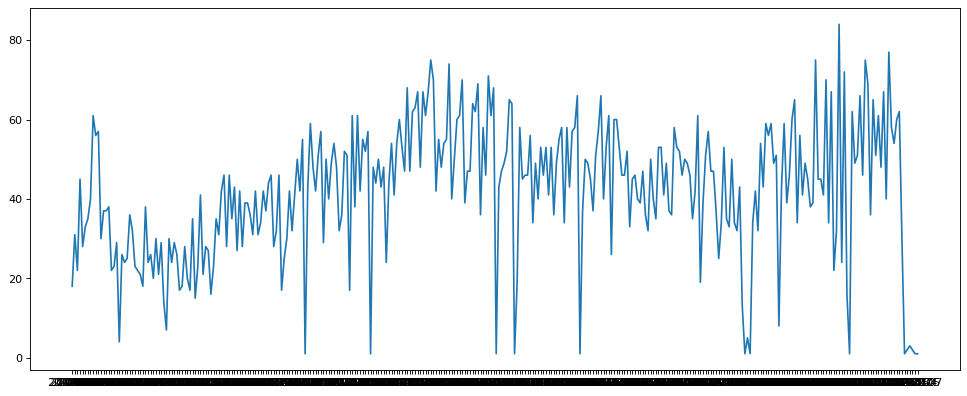

In [525]:
figure(figsize=(15, 6), dpi=80)
plt.plot(x,y);

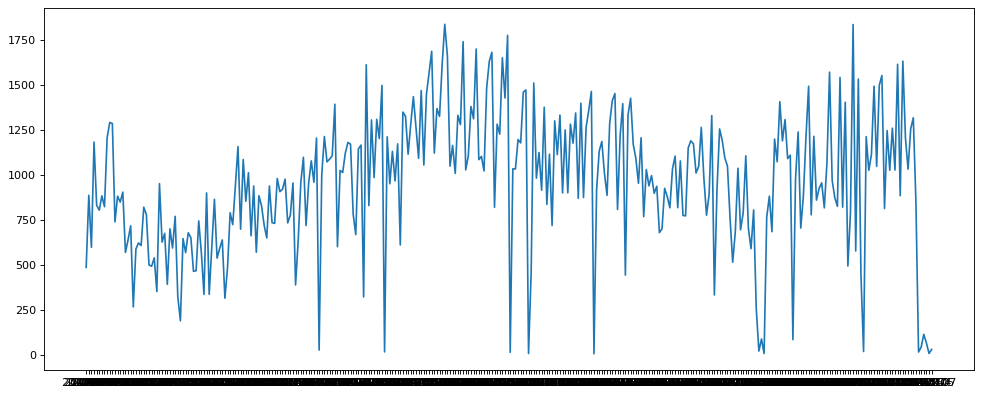

In [526]:
figure(figsize=(15, 6), dpi=80)
plt.plot(x,z);

# Ajout de 100% des jours en index

In [737]:
idx = pd.date_range('22-09-2020', '21-12-2021')
idx = idx.astype(object)
idx = list(idx)
def clean(idx):
    result = []
    for row in idx:
        row = str(row)
       #print(row)
        result.append(row[2:10])
    return result

new_index = clean(idx)
new_index[1]

'20-09-23'

In [752]:
global_df_groupped_linear = global_df_groupped.reindex(new_index,fill_value=0)
global_df_groupped_linear = global_df_groupped_linear[:"21-10-29"]

In [758]:
x2=global_df_groupped_linear.index
y2=global_df_groupped_linear[(    'Order', 'count')]
z2=global_df_groupped_linear[('total_ttc',   'sum')]

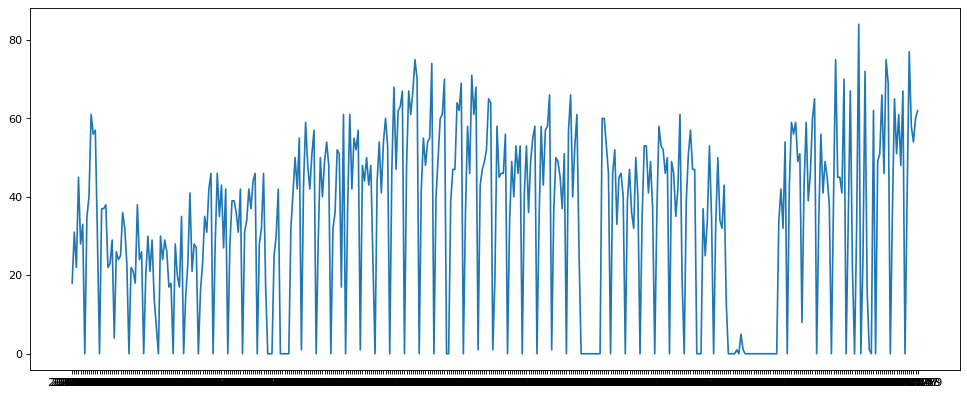

In [755]:
figure(figsize=(15, 6), dpi=80)
plt.plot(x2,y2);

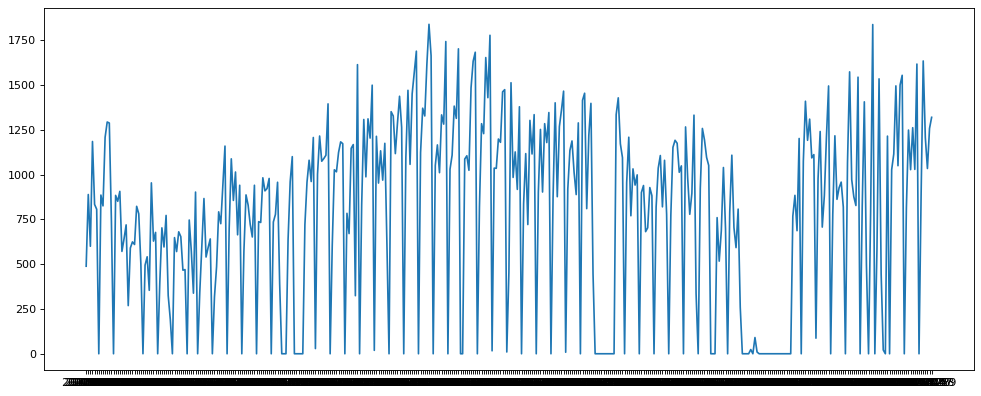

In [945]:
figure(figsize=(15, 6), dpi=80)
plt.plot(x2,z2);

In [761]:
global_df_groupped_linear

,total_ttc,Order
,sum,count
day,,
20-09-22,488.3,18
20-09-23,888.4,31
20-09-24,599.5,22
20-09-25,1184.2,45
20-09-26,833.1,28
...,...,...
21-10-25,1633.6,77
21-10-26,1206.5,58


In [762]:
global_df_groupped_linear.to_csv("../raw_data/global_df_groupped_linear.csv", encoding='utf-8', index=True)


# Histogramme par jour 

In [868]:
global_df_groupped_linear = pd.read_csv("../raw_data/global_df_groupped_linear.csv")
global_df_groupped_linear = global_df_groupped_linear.rename(columns={"Unnamed: 0":"Date"})
global_df_groupped_linear = global_df_groupped_linear.drop(0)
global_df_groupped_linear = global_df_groupped_linear.drop(1)
global_df_groupped_linear["Date"] = pd.to_datetime(global_df_groupped_linear["Date"],yearfirst=True)
global_df_groupped_linear

,Date,total_ttc,Order
2,2020-09-22,488.3,18
3,2020-09-23,888.4,31
4,2020-09-24,599.5,22
5,2020-09-25,1184.1999999999998,45
6,2020-09-26,833.0999999999999,28
...,...,...,...
400,2021-10-25,1633.6,77
401,2021-10-26,1206.5,58
402,2021-10-27,1033.5,54
403,2021-10-28,1257.0,60


In [873]:
global_df_groupped_linear["total_ttc"] = global_df_groupped_linear["total_ttc"].astype(float)
global_df_groupped_linear["Order"] = global_df_groupped_linear["Order"].astype(float)
global_df_groupped_linear['day_of_week'] = global_df_groupped_linear.Date.dt.dayofweek#.to_frame()
global_df_groupped_linear

,Date,total_ttc,Order,day_of_week
2,2020-09-22,488.3,18.0,1
3,2020-09-23,888.4,31.0,2
4,2020-09-24,599.5,22.0,3
5,2020-09-25,1184.2,45.0,4
6,2020-09-26,833.1,28.0,5
...,...,...,...,...
400,2021-10-25,1633.6,77.0,0
401,2021-10-26,1206.5,58.0,1
402,2021-10-27,1033.5,54.0,2
403,2021-10-28,1257.0,60.0,3


In [891]:
global_df_groupped_daily = global_df_groupped_linear.groupby(by=["day_of_week"]).sum()
global_df_groupped_daily

#result.columns = result.columns.get_level_values(1)

,total_ttc,Order
day_of_week,,
0,50233.61,2268.0
1,50081.35,2235.0
2,51821.55,2279.0
3,52932.60,2371.0
4,57735.46,2474.0
5,5141.65,209.0
6,41018.70,1707.0


In [884]:
X = global_df_groupped_daily.index
y = global_df_groupped_daily["total_ttc"]
z = global_df_groupped_daily["Order"]

In [1]:
figure(figsize=(15, 6), dpi=80)
plt.plot(X,y);

NameError: name 'figure' is not defined

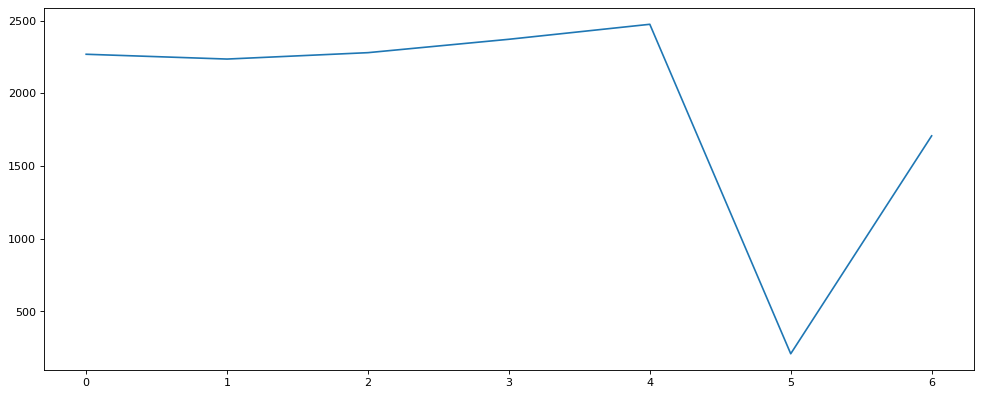

In [897]:
figure(figsize=(15, 6), dpi=80)
plt.plot(X,z);

# Histogramme par jour normalisé

In [930]:
global_df_groupped_linear = pd.read_csv("../raw_data/global_df_groupped_linear.csv")
global_df_groupped_linear = global_df_groupped_linear.rename(columns={"Unnamed: 0":"Date"})
global_df_groupped_linear = global_df_groupped_linear.drop(0)
global_df_groupped_linear = global_df_groupped_linear.drop(1)
global_df_groupped_linear["Date"] = pd.to_datetime(global_df_groupped_linear["Date"],yearfirst=True)
global_df_groupped_linear["total_ttc"] = global_df_groupped_linear["total_ttc"].astype(float)
global_df_groupped_linear["Order"] = global_df_groupped_linear["Order"].astype(float)
global_df_groupped_linear['day_of_week'] = global_df_groupped_linear.Date.dt.dayofweek#.to_frame()
global_df_groupped_linear

,Date,total_ttc,Order,day_of_week
2,2020-09-22,488.3,18.0,1
3,2020-09-23,888.4,31.0,2
4,2020-09-24,599.5,22.0,3
5,2020-09-25,1184.2,45.0,4
6,2020-09-26,833.1,28.0,5
...,...,...,...,...
400,2021-10-25,1633.6,77.0,0
401,2021-10-26,1206.5,58.0,1
402,2021-10-27,1033.5,54.0,2
403,2021-10-28,1257.0,60.0,3


In [931]:
global_df_groupped_linear_worked = global_df_groupped_linear[global_df_groupped_linear["total_ttc"] > 0]
dico = global_df_groupped_linear_worked["day_of_week"].value_counts().to_dict()
dico

{1: 54, 2: 53, 4: 51, 3: 51, 6: 49, 0: 45, 5: 14}

In [933]:
global_df_groupped_linear_worked["worked_day"] = global_df_groupped_linear_worked["day_of_week"].map(dico)
global_df_groupped_linear_worked

/var/folders/jp/43tqqk8n6vx93mnlkzb13g2w0000gn/T/ipykernel_14535/229937714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_df_groupped_linear_worked["worked_day"] = global_df_groupped_linear_worked["day_of_week"].map(dico)


,Date,total_ttc,Order,day_of_week,worked_day
2,2020-09-22,488.3,18.0,1,54
3,2020-09-23,888.4,31.0,2,53
4,2020-09-24,599.5,22.0,3,51
5,2020-09-25,1184.2,45.0,4,51
6,2020-09-26,833.1,28.0,5,14
...,...,...,...,...,...
400,2021-10-25,1633.6,77.0,0,45
401,2021-10-26,1206.5,58.0,1,54
402,2021-10-27,1033.5,54.0,2,53
403,2021-10-28,1257.0,60.0,3,51


In [935]:
global_df_groupped_linear_worked = global_df_groupped_linear_worked.groupby(by=["day_of_week"]).agg({"worked_day" : "min","total_ttc" : "sum","Order":"sum","day_of_week":"min","Date":"min"})
global_df_groupped_linear_worked


,worked_day,total_ttc,Order,day_of_week,Date
day_of_week,,,,,
0,45,50233.61,2268.0,0,2020-10-12
1,54,50081.35,2235.0,1,2020-09-22
2,53,51821.55,2279.0,2,2020-09-23
3,51,52932.60,2371.0,3,2020-09-24
4,51,57735.46,2474.0,4,2020-09-25
5,14,5141.65,209.0,5,2020-09-26
6,49,41018.70,1707.0,6,2020-09-27


In [939]:
global_df_groupped_linear_worked["total_per_day"] = ""
global_df_groupped_linear_worked["order_per_day"] = ""

for day in range(7):
    global_df_groupped_linear_worked["total_per_day"][day] = global_df_groupped_linear_worked["total_ttc"][day]/global_df_groupped_linear_worked["worked_day"][day]
    global_df_groupped_linear_worked["order_per_day"][day] = global_df_groupped_linear_worked["Order"][day]/global_df_groupped_linear_worked["worked_day"][day]

global_df_groupped_linear_worked




/var/folders/jp/43tqqk8n6vx93mnlkzb13g2w0000gn/T/ipykernel_14535/3931939999.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_df_groupped_linear_worked["total_per_day"][day] = global_df_groupped_linear_worked["total_ttc"][day]/global_df_groupped_linear_worked["worked_day"][day]
/var/folders/jp/43tqqk8n6vx93mnlkzb13g2w0000gn/T/ipykernel_14535/3931939999.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_df_groupped_linear_worked["order_per_day"][day] = global_df_groupped_linear_worked["Order"][day]/global_df_groupped_linear_worked["worked_day"][day]


,worked_day,total_ttc,Order,day_of_week,Date,total_per_day,order_per_day
day_of_week,,,,,,,
0,45,50233.61,2268.0,0,2020-10-12,1116.3,50.4
1,54,50081.35,2235.0,1,2020-09-22,927.432,41.3889
2,53,51821.55,2279.0,2,2020-09-23,977.765,43
3,51,52932.60,2371.0,3,2020-09-24,1037.89,46.4902
4,51,57735.46,2474.0,4,2020-09-25,1132.07,48.5098
5,14,5141.65,209.0,5,2020-09-26,367.261,14.9286
6,49,41018.70,1707.0,6,2020-09-27,837.116,34.8367


In [941]:
X = global_df_groupped_linear_worked.index
y = global_df_groupped_linear_worked["total_per_day"]
z = global_df_groupped_linear_worked["order_per_day"]

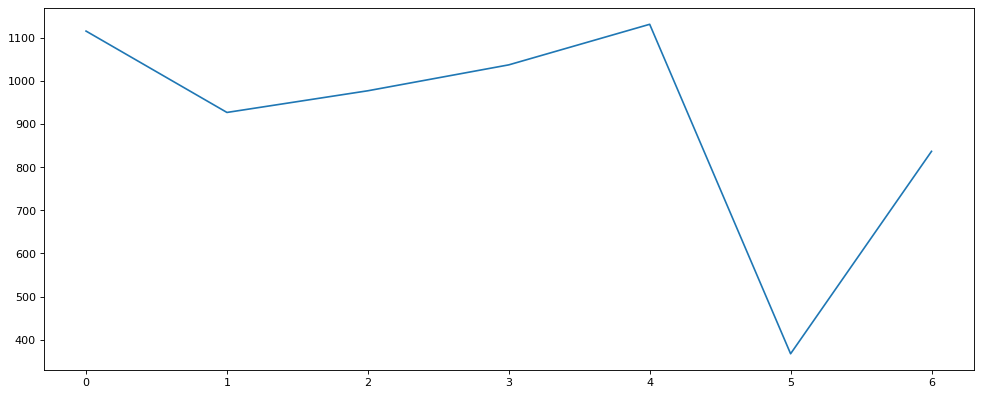

In [942]:
figure(figsize=(15, 6), dpi=80)
plt.plot(X,y);

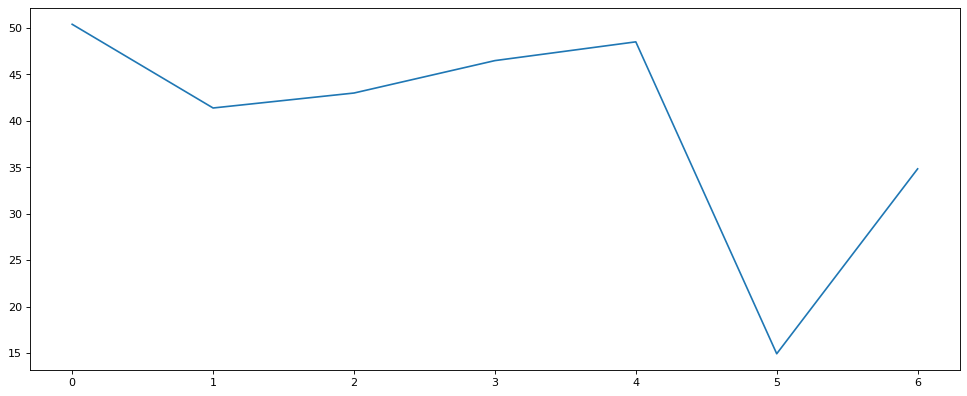

In [943]:
figure(figsize=(15, 6), dpi=80)
plt.plot(X,z);